In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
# Create the data
X = torch.linspace(-1, 1, 100).unsqueeze(-1)
y = 2*X**2 - 0.5*X + 1

# Standardize the values of y between 0 and 1
y_min = y.min()  # Find the minimum value of y
y_max = y.max()  # Find the maximum value of y
y = (y - y_min) / (y_max - y_min)  # Apply min-max scaling

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X.numpy(), y.numpy(), test_size=0.2, random_state=42)

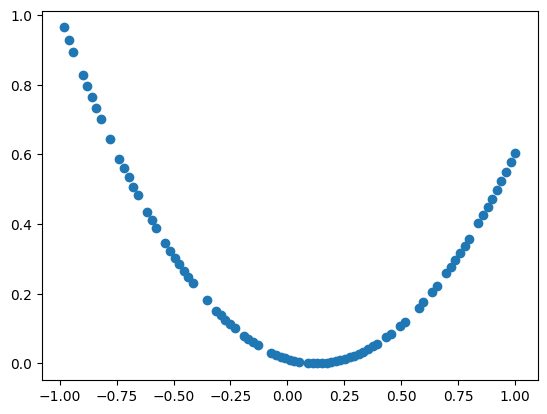

In [3]:
plt.scatter(X_train, y_train)

In [13]:
class SimpleNN(nn.Module):
    def __init__(self, activation_fn):
        super(SimpleNN, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(1, 8),
            activation_fn,
            nn.Linear(8, 8),
            activation_fn,
            nn.Linear(8, 1)
        )

    def forward(self, x):
        return self.layers(x)

In [14]:
def train(model, criterion, optimizer, epochs=200):
    model.train()
    train_losses = []
    for epoch in range(epochs):
        optimizer.zero_grad()  # Clear previous gradients

        predictions = model(X_train)  # Forward pass
        loss = criterion(predictions, y_train)  # Compute the loss

        loss.backward()  # Backward pass to compute gradients
        optimizer.step()  # Update model parameters

        train_losses.append(loss.item())  # Save the loss value for plotting
    return train_losses


In [15]:
def evaluate(model):
    model.eval()
    with torch.no_grad():
        predictions = model(X_test)
        loss = nn.MSELoss()(predictions, y_test)
    return loss.item()

In [16]:
activation_functions = {
    "ReLU": nn.ReLU(),
    "Sigmoid": nn.Sigmoid(),
    "Tanh": nn.Tanh(),
    "LeakyReLU": nn.LeakyReLU(),
    "ELU": nn.ELU(),
    "Softplus": nn.Softplus(),
    "No activation": nn.Identity()
}

In [18]:
def train(model, criterion, optimizer, epochs=200):
    model.train()
    train_losses = []
    for epoch in range(epochs):
        optimizer.zero_grad()  # Clear previous gradients

        # Convert X_train and y_train to PyTorch tensors
        inputs = torch.from_numpy(X_train).float()  # Convert X_train to a PyTorch tensor
        targets = torch.from_numpy(y_train).float() # Convert y_train to a PyTorch tensor

        predictions = model(inputs)  # Forward pass, using the tensor inputs
        loss = criterion(predictions, targets)  # Compute the loss, using the tensor targets

        loss.backward()  # Backward pass to compute gradients
        optimizer.step()  # Update model parameters

        train_losses.append(loss.item())  # Save the loss value for plotting
    return train_losses

<ipython-input-19-c0f3d7ff79e4>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


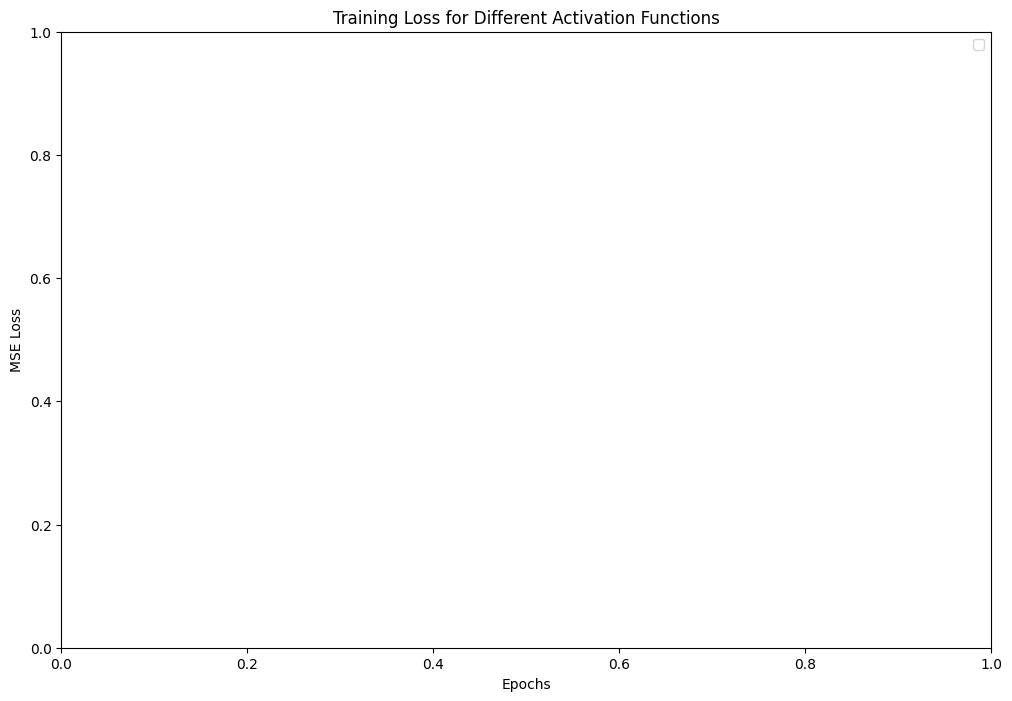

In [19]:
plt.figure(figsize=(12, 8))
for name, result in results.items():
    plt.plot(result["train_losses"], label=f"{name} activation")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Training Loss for Different Activation Functions")
plt.legend()
plt.show()

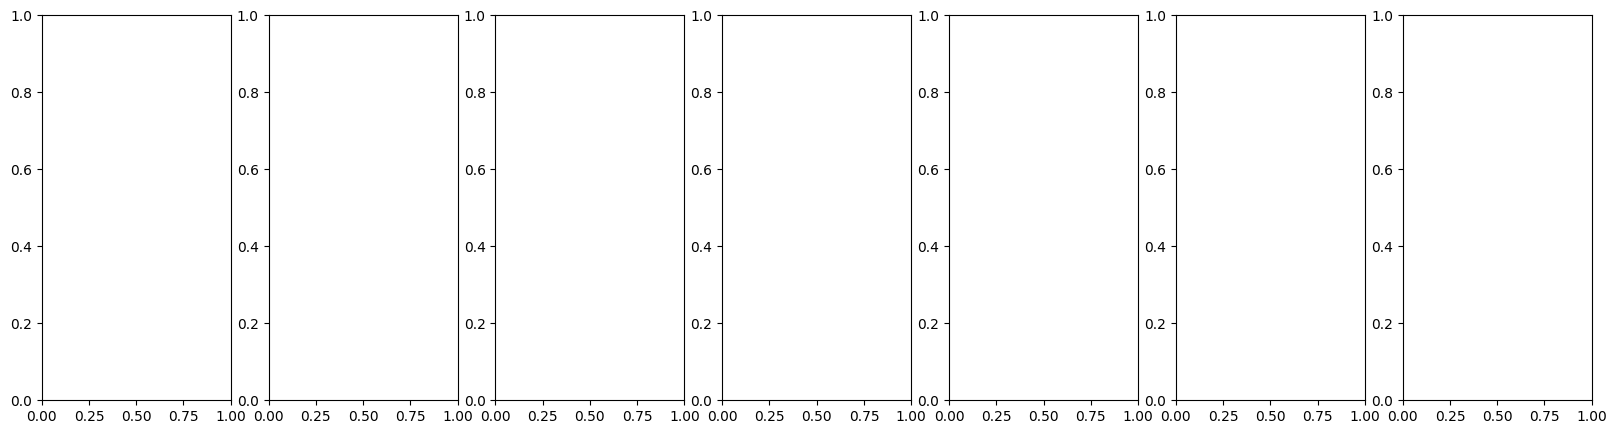

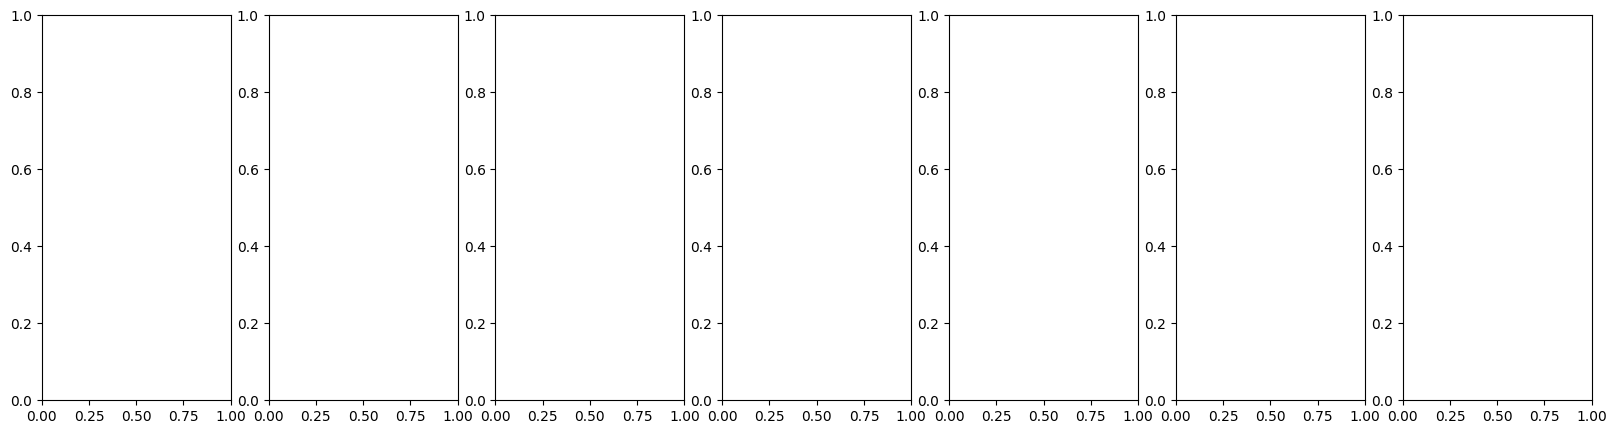

In [21]:
# Plot training losses and predictions
fig, axes = plt.subplots(1, len(activation_functions), figsize=(20, 5))

# Plot training losses and predictions
fig, axes = plt.subplots(1, len(activation_functions), figsize=(20, 5))

for i, (name, result) in enumerate(results.items()):

    axes[i].plot(X, y, label="Actual", alpha=0.6)
    axes[i].plot(X, result["predictions"], label="Predicted", alpha=0.6)
    axes[i].set_title(f"Activation: ({name})")
    # axes[i].set_xlabel("Input")
    # axes[i].set_ylabel("Output")
    axes[i].legend()
    # axes[i].set_xlabel("Input")
    # axes[i].set_ylabel("Output")
    axes[i].legend()